<a href="https://colab.research.google.com/github/jeevan499/Capstone-Project-on-Fake-and-Real-News-Detection/blob/main/cotton_plant_disease_prediction_cnn%20by%20Jeevan%20Raj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [8]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [9]:
train_data_path = '/content/drive/MyDrive/Cotton Plant Disease Prediction CNN/Cotton Plant Disease Prediction CNN/Cotton Disease/train'
test_data_path = '/content/drive/MyDrive/Cotton Plant Disease Prediction CNN/Cotton Plant Disease Prediction CNN/Cotton Disease/test'

In [10]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [11]:
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

In [12]:
training_data = training_datagen.flow_from_directory(train_data_path, 
                                      target_size=(150, 150), 
                                      batch_size=32,
                                      class_mode='categorical')

Found 1951 images belonging to 4 classes.


In [13]:
test_datagen = ImageDataGenerator(rescale =1./255)

In [14]:
test_data = test_datagen.flow_from_directory(test_data_path,
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='categorical')

Found 106 images belonging to 4 classes.


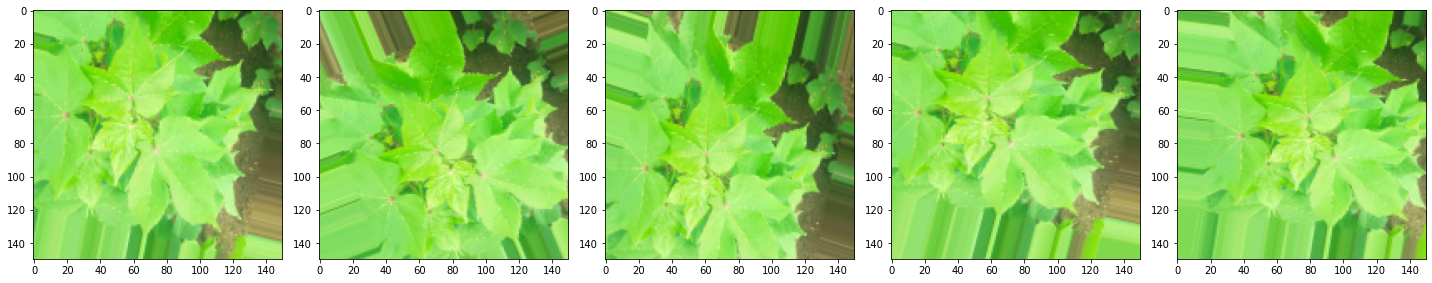

In [15]:
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [16]:
model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
 
                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), 
                                    keras.layers.Dense(units=128, activation='relu'), 
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=4, activation='softmax') 
])

In [17]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
history = model.fit(training_data, 
                          epochs=100, 
                          verbose=1, 
                          validation_data= test_data,
                          )

Epoch 1/100
61/61 [==============================] - 388s 6s/step - loss: 1.2993 - accuracy: 0.4090 - val_loss: 1.3474 - val_accuracy: 0.2642
Epoch 2/100
61/61 [==============================] - 27s 437ms/step - loss: 1.0767 - accuracy: 0.5336 - val_loss: 1.0850 - val_accuracy: 0.5189
Epoch 3/100
61/61 [==============================] - 27s 440ms/step - loss: 0.9636 - accuracy: 0.6146 - val_loss: 1.0613 - val_accuracy: 0.5849
Epoch 4/100
61/61 [==============================] - 27s 435ms/step - loss: 0.9121 - accuracy: 0.6181 - val_loss: 0.8688 - val_accuracy: 0.6321
Epoch 5/100
61/61 [==============================] - 27s 445ms/step - loss: 0.8651 - accuracy: 0.6617 - val_loss: 0.7427 - val_accuracy: 0.6981
Epoch 6/100
61/61 [==============================] - 27s 438ms/step - loss: 0.8190 - accuracy: 0.6873 - val_loss: 0.8437 - val_accuracy: 0.6509
Epoch 7/100
61/61 [==============================] - 26s 435ms/step - loss: 0.8338 - accuracy: 0.6709 - val_loss: 0.7794 - val_accuracy: 0

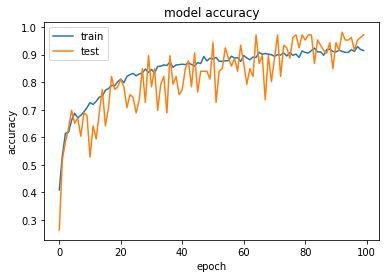

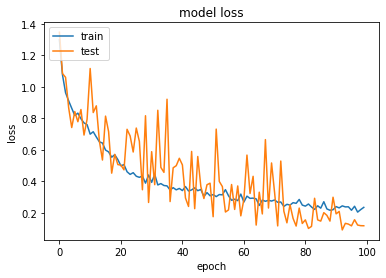

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
from tensorflow.keras.preprocessing import image
import numpy as np
IMAGE_SIZE =(150,150)

def predict_it(image_location):
  test_image=image.load_img(image_location, target_size = IMAGE_SIZE)
  plt.imshow(test_image)
  test_image=image.img_to_array(test_image)
  test_image=test_image/255
  test_image = np.expand_dims(test_image, axis = 0)
  preds=np.argmax(model.predict(test_image))
  if preds==0:
    print("The leaf is diseased cotton leaf")
  elif preds==1:
    print("The leaf is diseased cotton plant")
  elif preds==2:
    print("The leaf is fresh cotton leaf")
  else:
    print("The leaf is fresh cotton plant")

In [35]:
val='/content/drive/MyDrive/Cotton Plant Disease Prediction CNN/Cotton Plant Disease Prediction CNN/Cotton Disease/val/diseased cotton leaf/dis_leaf (100)_iaip (1).jpg'

The leaf is diseased cotton leaf


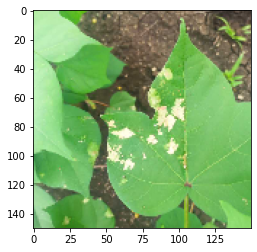

In [37]:
predict_it(val)

The leaf is fresh cotton leaf


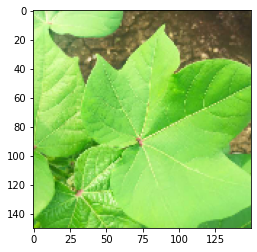

In [39]:
predict_it('/content/drive/MyDrive/Cotton Plant Disease Prediction CNN/Cotton Plant Disease Prediction CNN/Cotton Disease/val/fresh cotton leaf/d (106)_iaip (1).jpg')

The leaf is fresh cotton plant


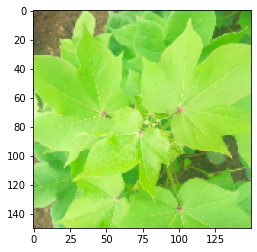

In [40]:
predict_it('/content/drive/MyDrive/Cotton Plant Disease Prediction CNN/Cotton Plant Disease Prediction CNN/Cotton Disease/val/fresh cotton plant/dsd (142)_iaip (1).jpg')

The leaf is fresh cotton leaf


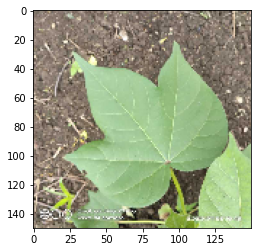

In [41]:
predict_it('/content/drive/MyDrive/Cotton Plant Disease Prediction CNN/Cotton Plant Disease Prediction CNN/Cotton Disease/val/fresh cotton leaf/d (38)_iaip.jpg')

In [44]:
validation_path='/content/drive/MyDrive/Cotton Plant Disease Prediction CNN/Cotton Plant Disease Prediction CNN/Cotton Disease/val'

In [45]:
valid_data = test_datagen.flow_from_directory(validation_path, target_size=(150, 150), 
                                      batch_size=32,
                                      class_mode='categorical')

Found 506 images belonging to 4 classes.


In [46]:
predicted = model.predict(valid_data[0][0])

In [47]:
actual=[]
for i in valid_data[0][1]:
  actual.append(np.argmax(i))
predict=[]
for i in predicted:
  predict.append(np.argmax(i))

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(actual,predict)

1.0